

**“The sentiment analysis  and topic modelling on discussions about countries on Reddit”**

In our project we want to make a sentiment analysis and topic modelling of countries subreddits and compare them between each other. We also would like to see how the result of our project would align with Happiness research of countries ().
We will conduct the following steps:
1. Extract subreddits associated with each country and places in this countries (EU, US, Canada).
2. Use different sentiment analysers and see how well they work with different national languages (for example subreddits of Spain are written in Spanish) and amount of text used (full post vs summary of the post). Apply topic modelling to subreddits of different countries and see the most popular themes for discussion in each country.
3. Study how the sentiment analysis is connected with the certain identified topics and whether the results remain the same for different countries (foe example food is positively discussed in both Spain and Germany).
4. Also, we are interested in using 2 different approaches for analysis on non-English texts and comparing the results:
- apply sentiment analysers and topic extraction models for a specific language (when applicable, first identifying the language)
- first translate Reddits to English and then applying models designed for English text.


## Installation stuff

In [11]:
# general libraries
import json
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from itertools import chain



# for translation
#from googletrans import Translator
#from langdetect import detect
from tqdm import tqdm

# for topic modeling
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import models, corpora
from collections import Counter
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer

# BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer


# for sentiment and emotions analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# essential installations

# pip install datasets
# !pip install langdetect
# !pip install googletrans==4.0.0-rc1
#!pip install vaderSentiment
#!pip install transformers
# for topic modeling
#!pip install umap-learn
#!pip install sentence_transformers
#!pip install bertopic
#!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


## Extracting subreddits from the original data (do not run!)

In [ ]:
# import data
from datasets import load_dataset
dataset = load_dataset("reddit")
train_data = dataset['train']

In [ ]:
# creating lists with the subreddits of the countries we re interested in

# Create an empty list to store the matching reddits
finland_reddits = []
denmark_reddits = []
switzerland_reddits = []
iceland_reddits = []
netherlands_reddits = []
norway_reddits = []
sweden_reddits = []
luxembourg_reddits = []
newzealand_reddits = []
austria_reddits = []
australia_reddits = []
israel_reddits = []
germany_reddits = []
canada_reddits = []
ireland_reddits = []
costarica_reddits = []
uk_reddits = []
czechrepublic_reddits = []
belgium_reddits = []
france_reddits = []
malta_reddits = []


# Iterate through the reddits and store the matching ones
for reddit in train_data:
    if re.search(r'\bFinland\b', reddit['subreddit']):
        finland_reddits.append(reddit)
    elif re.search(r'\bDenmark\b', reddit['subreddit']):
        denmark_reddits.append(reddit)
    elif re.search(r'\bSwitzerland\b', reddit['subreddit']):
        switzerland_reddits.append(reddit)
    elif re.search(r'\bIceland\b', reddit['subreddit']):
        iceland_reddits.append(reddit)
    elif re.search(r'\bNetherlands\b', reddit['subreddit']):
        netherlands_reddits.append(reddit)
    elif re.search(r'\bNorway\b', reddit['subreddit']):
        norway_reddits.append(reddit)
    elif re.search(r'\bsweden\b', reddit['subreddit']):
        sweden_reddits.append(reddit)

    elif re.search(r'\bLuxembourg\b', reddit['subreddit']):
        luxembourg_reddits.append(reddit)
    elif re.search(r'\bnewzealand\b', reddit['subreddit']):
        newzealand_reddits.append(reddit)
    elif re.search(r'\bAustria\b', reddit['subreddit']):
        austria_reddits.append(reddit)
    elif re.search(r'\baustralia\b', reddit['subreddit']):
        australia_reddits.append(reddit)
    elif re.search(r'\bIsrael\b', reddit['subreddit']):
        israel_reddits.append(reddit)
    elif re.search(r'\bgermany\b', reddit['subreddit']):
        germany_reddits.append(reddit)
    elif re.search(r'\bcanada\b', reddit['subreddit']):
        canada_reddits.append(reddit)
    elif re.search(r'\bireland\b', reddit['subreddit']):
        ireland_reddits.append(reddit)

    elif re.search(r'\bcosta_rica\b', reddit['subreddit']):
        costarica_reddits.append(reddit)
    elif re.search(r'\bunitedkingdom\b', reddit['subreddit']):
        uk_reddits.append(reddit)
    elif re.search(r'\bczech\b', reddit['subreddit']):
        czechrepublic_reddits.append(reddit)
    elif re.search(r'\bbelgium\b', reddit['subreddit']):
        belgium_reddits.append(reddit)
    elif re.search(r'\bfrance\b', reddit['subreddit']):
        france_reddits.append(reddit)
    elif re.search(r'\bmalta\b', reddit['subreddit']):
        malta_reddits.append(reddit)


NameError: ignored

In [ ]:
# save the data into 16 separate json files

countries = [finland_reddits, denmark_reddits, switzerland_reddits, iceland_reddits, norway_reddits, sweden_reddits,
            newzealand_reddits, austria_reddits, australia_reddits, israel_reddits, germany_reddits, canada_reddits,
            ireland_reddits, uk_reddits, belgium_reddits, france_reddits]

country_names = ['finland', 'denmark', 'switzerland', 'iceland', 'norway', 'sweden',
                 'newzealand', 'austria', 'australia', 'israel', 'germany', 'canada',
                 'ireland', 'uk', 'belgium', 'france']

for i in range(len(countries)):
    filename = f'{country_names[i]}_reddits.json'
    with open(filename, 'w') as file:
        json.dump(countries[i], file)

## Translation of the reddits to english

In [ ]:
# initializing the translator
translator = Translator()

def translate_large_text(text, src_lang, dest_lang):
    # Define the size of each text chunk
    CHUNK_SIZE = 5000

    translated_text = ""
    for i in range(0, len(text), CHUNK_SIZE):
        time.sleep(1)
        translator = Translator()
        chunk = text[i:i+CHUNK_SIZE]
        translated_chunk = translator.translate(chunk, src=src_lang, dest=dest_lang).text
        translated_text += translated_chunk
    return translated_text

def translate_reddit(subreddit):
    for i in tqdm(range(len(subreddit))):
        if detect(subreddit[i]['normalizedBody']) != 'en':
            try:
                subreddit[i]['translated_body'] = translate_large_text(subreddit[i]['normalizedBody'], detect(subreddit[i]['normalizedBody']), 'en')
            except:
                time.sleep(1)
                translator = Translator()
                subreddit[i]['translated_body'] = translate_large_text(subreddit[i]['normalizedBody'], detect(subreddit[i]['normalizedBody']), 'en')
        else:
            subreddit[i]['translated_body'] = subreddit[i]['normalizedBody']
    return subreddit

## Unzip  and download the translated data

In [40]:
# link https://drive.google.com/file/d/1xv6S2YTSNAEQpupCMTs1Qy7lSPXXThHt/view

! gdown 1xv6S2YTSNAEQpupCMTs1Qy7lSPXXThHt

! unzip -o /content/reddit_sentiment.zip

Downloading...
From: https://drive.google.com/uc?id=1xv6S2YTSNAEQpupCMTs1Qy7lSPXXThHt
To: /content/reddit_sentiment.zip
100% 13.6M/13.6M [00:00<00:00, 119MB/s]


In [42]:
country_names = ['finland', 'denmark', 'switzerland', 'norway', 'sweden', 'newzealand', 'austria',
                 'australia', 'israel', 'germany', 'canada','ireland', 'uk', 'belgium', 'france']

translated_jsons = ['finland_reddits.json','denmark_reddits.json','switzerland_reddits.json','norway_reddits.json',
                    'sweden_reddits.json', 'newzealand_reddits.json', 'austria_reddits.json', 'australia_reddits.json',
                   'israel_reddits.json', 'germany_reddits.json', 'canada_reddits.json',
                   'ireland_reddits.json', 'uk_reddits.json', 'belgium_reddits.json', 'france_reddits.json']

countries_reddits = []

for file_name in translated_jsons:
    with open(file_name, 'r') as f:
        data = json.load(f)
        countries_reddits.append(data)

In [43]:
finland_body, denmark_body, switzerland_body, norway_body, sweden_body, newzealand_body, austria_body, australia_body, israel_body, germany_body, canada_body, ireland_body, uk_body, belgium_body, france_body = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

countries_bodies = [finland_body, denmark_body, switzerland_body, norway_body, sweden_body, newzealand_body, austria_body, australia_body, israel_body, germany_body, canada_body, ireland_body, uk_body, belgium_body, france_body]

for i in range(len(countries_reddits)):
    body = ' '.join([item['translated_body'] for item in countries_reddits[i]])
    countries_bodies[i].append(body)

## Multilingual sentiment

In [17]:
#initialize our model and tokenizer using a BERT model for sequence classification and the corresponding BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# function to calculate sentiment for long text
def multilingual_sentiment(txt):
    # converting a string of text into a list of tokens
    tokens = tokenizer.encode_plus(txt, add_special_tokens=False,
                               return_tensors='pt') # return_tensors='pt' to return PyTorch tensors

    # Preparing the chunks
    input_id_chunks = list(tokens['input_ids'][0].split(510))  # Convert to list
    mask_chunks = list(tokens['attention_mask'][0].split(510))  # Convert to list

    #add padding to tensor chunks to ensure they satisfy the 512 tensor length required by BERT
    for i in range(len(input_id_chunks)):
        # get required padding length
        pad_len = 512 - input_id_chunks[i].shape[0]
        # check if tensor length satisfies required chunk size
        if pad_len > 0:
            # if padding length is more than 0, we must add padding
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([0] * pad_len)
            ])
            mask_chunks[i] = torch.cat([
                mask_chunks[i], torch.Tensor([0] * pad_len)
            ])

    #Reshape into single tensors and add to an input dictionary for BERT
    input_ids = torch.stack(input_id_chunks)
    attention_mask = torch.stack(mask_chunks)

    input_dict = {
    'input_ids': input_ids.long(), #change the input IDs tensor datatype to long
    'attention_mask': attention_mask.int() # convert attention mask tensor datatype to int (required by BERT)
    }

    # Making Predictions
    outputs = model(**input_dict)
    # Get a set of three activation values for each chunk
    probs = torch.nn.functional.softmax(outputs[0], dim=-1)

    # Take the mean of the values in each class
    probs = probs.mean(dim=0)

    # Extract the winning class
    class_index = torch.argmax(probs).item()
    class_labels = ['1', '2', '3', '4', '5']

    return class_labels[class_index]

In [15]:
with open('france_reddits.json', 'r') as f:
    data = json.load(f)

In [18]:
df = pd.DataFrame(data)

for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing Rows'):

    # Apply the sentiment analysis and assign the compound score to 'sentiment_compound'
    df.at[index, 'star_en'] = multilingual_sentiment(row['translated_body'])
    df.at[index, 'star_fr'] = multilingual_sentiment(row['normalizedBody'])

df["SameValue"] = np.where(df["star_en"] == df["star_fr"], True, False)

Processing Rows: 100%|██████████| 478/478 [45:20<00:00,  5.69s/it]


In [19]:
false_count = (df["SameValue"] == False).sum()
all_count = len(data)
percentage_of_discrepancy = false_count / all_count *100
print(round(percentage_of_discrepancy))

34


### Visualization

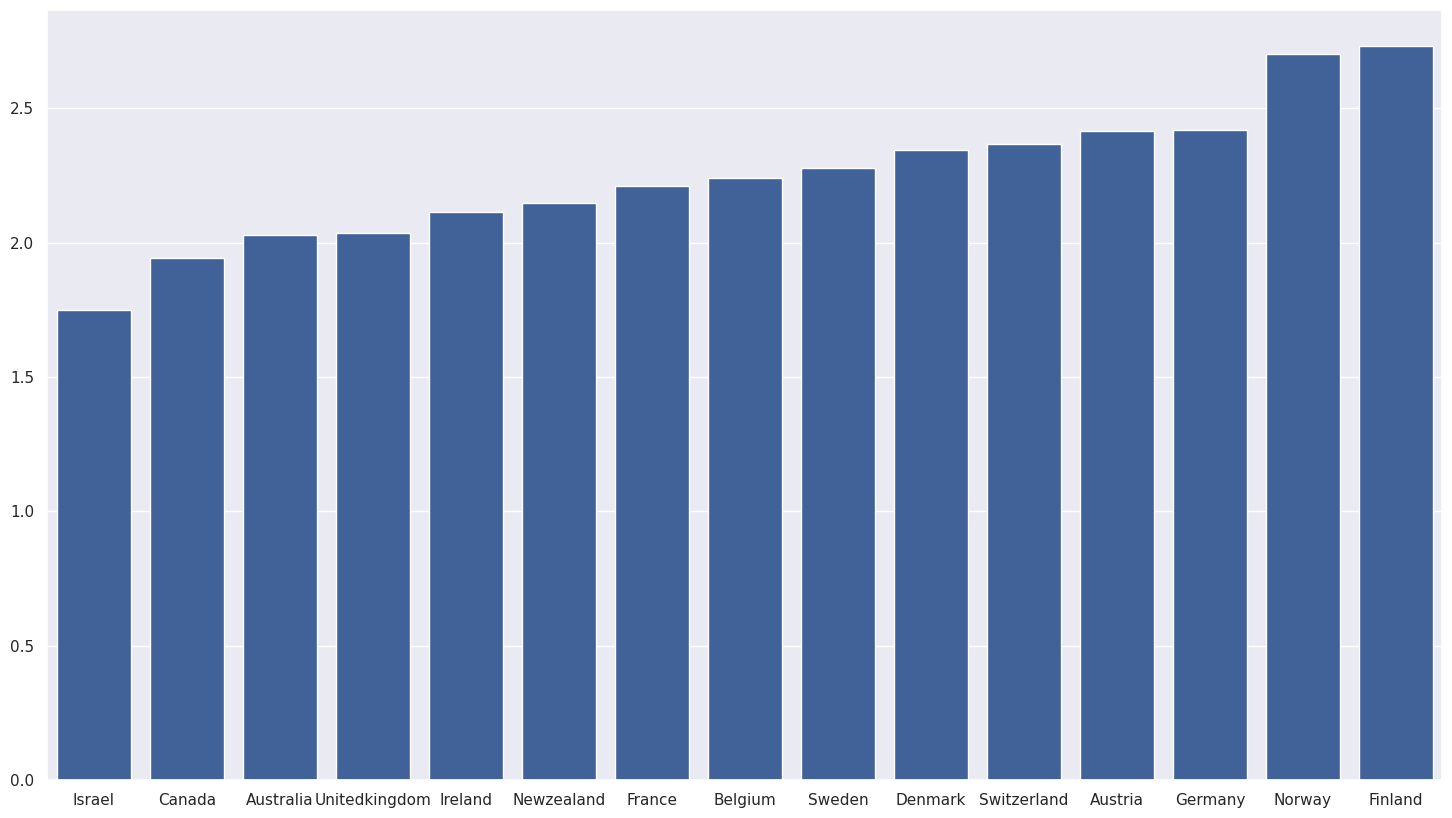

In [44]:
sns.set(rc={'figure.figsize':(18,10)})

df_3 = pd.DataFrame(list(chain.from_iterable(countries_reddits)))
df_3['bert_sentiment'] = df_3['bert_sentiment'].astype('int64')
means = df_3.groupby('subreddit')['bert_sentiment'].mean().sort_values()

country_names_cap = [i.capitalize() for i in list(means.index)]
sns.barplot(x= country_names_cap, y = list(means.values), color="#325da8")
plt.savefig('plot.png', dpi=300)


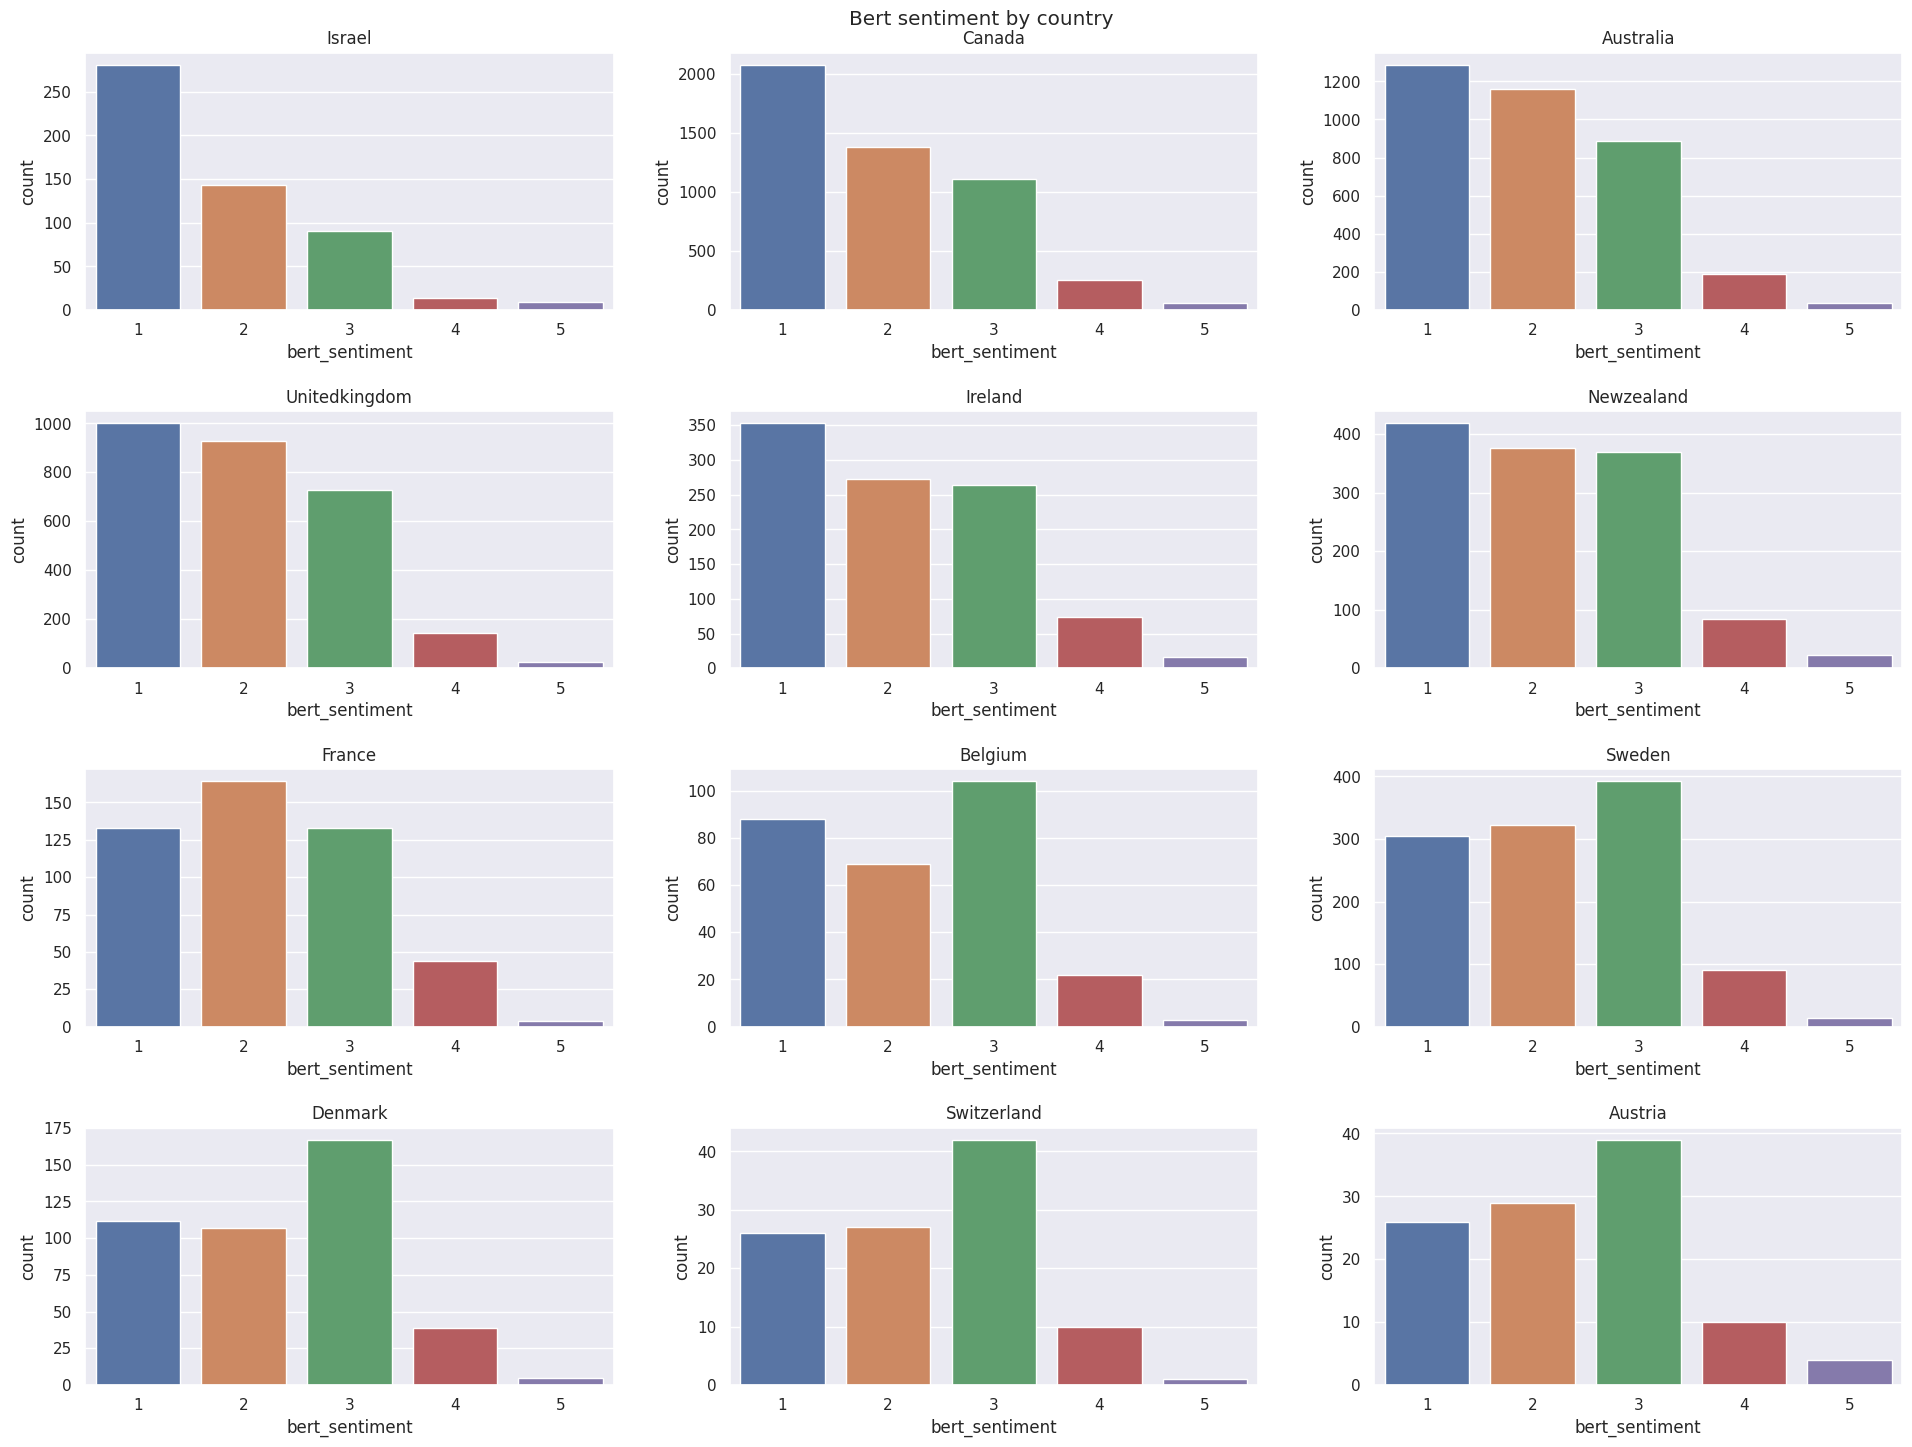

In [45]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.tight_layout(pad=4.0)
fig.suptitle('Bert sentiment by country')

counter = 0
col = 0
while col < 4:
    row = 0
    while row < 3:
        country = means.index[counter]
        sns.countplot(ax=axes[col, row],
                      data = df_3.loc[df_3.subreddit==country,:]
                      , x='bert_sentiment')
        axes[col,row].title.set_text(country_names_cap[counter])
        counter += 1
        row += 1
    col += 1

## Compare Bert and Vader

In [ ]:
analyzer = SentimentIntensityAnalyzer()
df = pd.DataFrame(data)

for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing Rows'):

    # Apply the sentiment analysis and assign the compound score to 'sentiment_compound'
    df.at[index, 'bert'] = multilingual_sentiment(row['translated_body'])
    df.at[index, 'vader'] = math.ceil((analyzer.polarity_scores(row['translated_body'])['compound'] + 1) * 2.5)

In [ ]:
df['diff'] = df['bert'].astype(int) - df['vader'].astype(int)
df[df['diff'] == -4]

## Topic modeling by Gensim on translated data all 16 subreddits together

In [46]:
stop_words = stopwords.words('english')

stop_words.extend(['get', 'people', 'dr', 'tl', 'would', 'will', 'don', 'go', 'think', 'like', 'make', 'say',
                   'att', 'det', 'one', 'could', 'us', 'also', 'even', 'de', 'en', 'well', 'really', 'know',
                  'much', 'way'])

In [47]:
# convert documents to string
documents = countries_bodies
flattened_documents = [' '.join(doc) for doc in documents]

In [48]:

# Tokenize and filter the documents
tokenized_documents = [word_tokenize(doc.lower()) for doc in flattened_documents]

filtered_documents = [
    [token for token in doc if token.isalpha() and token not in stop_words]
    for doc in tokenized_documents
]

In [49]:
# create a plot with 30 most frequent words

# Flatten the tokenized documents into a single list of words
all_words = [word for doc in filtered_documents for word in doc]

# Count the frequency of each word
word_freq = Counter(all_words)

# Select the top 30 most frequent words
top_words = word_freq.most_common(30)

# Extract the word and frequency for plotting
words = [word for word, freq in top_words]
freqs = [freq for word, freq in top_words]

# Create the bar chart
fig = go.Figure([go.Bar(x=words, y=freqs)])

# Set the layout
fig.update_layout(
    xaxis=dict(tickangle=30),
    yaxis=dict(title='Frequency'),
    title='30 Most Frequent Words',
)

# Show the interactive plot
fig.show()

In [50]:
# Create the dictionary
dictionary = corpora.Dictionary(filtered_documents)
dictionary.filter_extremes(no_below=2)

# Create the corpus
corpus = [dictionary.doc2bow(doc) for doc in filtered_documents]

In [51]:
# LDA topic modeling
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                     alpha=0.001, eta=0.001, iterations=10000)

# Get the list of topics with 10 keywords each
topics = lda_model.print_topics(num_topics=num_topics, num_words=5)

In [52]:
# topic distribution for each document
document_topics = []
for doc_bow in corpus:
    topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
    document_topics.append([prob for _, prob in topic_distribution])

In [53]:
# list of topics with keywords
topics = lda_model.print_topics(num_topics=num_topics, num_words=5)

topic_keywords = [topic[1] for topic in topics]

topics

[(0,
  '0.006*"harper" + 0.006*"canadians" + 0.005*"palestinian" + 0.005*"bell" + 0.005*"quebec"'),
 (1,
  '0.006*"finnish" + 0.005*"canadians" + 0.004*"harper" + 0.004*"quebec" + 0.003*"bell"'),
 (2,
  '0.005*"palestinian" + 0.004*"finnish" + 0.003*"israelis" + 0.002*"gaza" + 0.002*"sd"'),
 (3,
  '0.006*"nz" + 0.003*"nhs" + 0.003*"australians" + 0.003*"telstra" + 0.003*"abbott"'),
 (4,
  '0.004*"nz" + 0.004*"telstra" + 0.003*"nbn" + 0.003*"dublin" + 0.002*"australians"'),
 (5,
  '0.008*"nz" + 0.008*"canadians" + 0.007*"quebec" + 0.007*"bell" + 0.005*"harper"'),
 (6,
  '0.023*"nz" + 0.007*"auckland" + 0.006*"oslo" + 0.006*"maori" + 0.004*"norwegians"'),
 (7,
  '0.004*"canadians" + 0.003*"harper" + 0.003*"ontario" + 0.003*"quebec" + 0.002*"bell"'),
 (8,
  '0.005*"nz" + 0.005*"brussels" + 0.005*"canadians" + 0.004*"bell" + 0.004*"harper"'),
 (9,
  '0.004*"harper" + 0.004*"bell" + 0.004*"canadians" + 0.003*"quebec" + 0.003*"ontario"')]

In [54]:
# plot Topic Distribution Across Document

data = []
for topic_index in range(num_topics):
    topic_contribution = [topic[topic_index] for topic in document_topics]
    data.append(go.Bar(
        x=country_names,
        y=topic_contribution,
        name=f'Topic {topic_index + 1}',
    ))


layout = go.Layout(
    barmode='stack',
    xaxis=dict(title='Countries'),
    yaxis=dict(title='Topic Contribution'),
    title='Topic Distribution Across Documents',
)


fig = go.Figure(data=data, layout=layout)
fig.show()

In [55]:
# plot similarity between topics

similarity_matrix = np.zeros((num_topics, num_topics))

for i in range(num_topics):
    for j in range(num_topics):
        vector1 = np.array([float(weight.split("*")[0]) for weight in topic_keywords[i].split("+")])
        vector2 = np.array([float(weight.split("*")[0]) for weight in topic_keywords[j].split("+")])
        similarity_matrix[i, j] = cosine_similarity([vector1], [vector2])

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=similarity_matrix,
    x=[f"Topic {i+1}" for i in range(num_topics)],
    y=[f"Topic {i+1}" for i in range(num_topics)],
    colorscale='Viridis',  # Use Viridis colorscale
    reversescale=True,  # Reverse the colorscale
))

fig.update_layout(
    title='Topic Similarity',
    xaxis=dict(title='Topics'),
    yaxis=dict(title='Topics'),
)

# Show the interactive plot
fig.show()

## Topic modeling with the BERTopic

In [56]:
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
# I increased the minimum cluster size so we have less but stronger supported clusters.
hdbscan_model = HDBSCAN(min_cluster_size=20,
                        metric='euclidean', cluster_selection_method='eom', prediction_data=True)


ctfidf_model = ClassTfidfTransformer()




# All steps together
topic_model = BERTopic(
        # Step 1 - Extract embeddings

  embedding_model=embedding_model,
        # Step 2 - Reduce dimensionality

  umap_model=umap_model,
        # Step 3 - Cluster reduced embeddings

  hdbscan_model=hdbscan_model,
    ctfidf_model=ctfidf_model,
    language = "english"

)




In [57]:
BERTopic_data = []
for country in countries_reddits:
     BERTopic_data.append([reddit['translated_body'] for reddit in country])

In [58]:
relativTopicCountCountries = {}

In [ ]:
embeddings = []
for i in range(len(BERTopic_data)):
    embeddings.append(embedding_model.encode(BERTopic_data[i], show_progress_bar=True))


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/112 [00:00<?, ?it/s]

Batches:   0%|          | 0/17 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
for i in range(len(BERTopic_data)):
    result = topic_model.fit(BERTopic_data[i],embeddings[i])
    # Fine-tune topic representations after training BERTopic
    stop_words = stopwords.words('english')

    stop_words.extend(['get', 'people', 'dr', 'tl', 'would', 'will', 'don', 'go', 'think', 'like', 'make', 'say',
                       'att', 'det', 'one', 'could', 'us', 'also', 'even', 'de', 'en', 'well', 'really', 'know',
                      'much', 'way', 'to'])
    vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3), analyzer='word')
    topic_model.update_topics(BERTopic_data[i], vectorizer_model=vectorizer_model)
    if len(topic_model.get_topics()) > 1:
        # sorting the extracted topics based on their size (members)
        countList = sorted(list(topic_model.topic_sizes_.values()), reverse= True)[:9]
        itemsNum = len(countries_reddits[i])
        # calculating the rltiv amount each topic acounts for
        relativTopicCount = [count/itemsNum*100 for count in countList]
        #fill with 0 for stacked barchart (equal length needed9
        fill = 9 - len(relativTopicCount)
        while fill > 0:
            relativTopicCount.append(0)
            fill-=1
        # create last category cotaining all reddits except the the top 10
        others = (itemsNum-sum(countList))/itemsNum*100
        relativTopicCount.append(others)
        relativTopicCountCountries[country_names[i]] = relativTopicCount
        fig = topic_model.visualize_barchart(height=200, width=300, top_n_topics=10, title=f'{country_names[i]}_topics')
        fig.write_html(f'figures/{country_names[i]}_topics.html')










finland
finland 0.0
denmark
denmark 0.0
switzerland
norway
norway 0.0
sweden
sweden 14.23487544483986
newzealand
newzealand 2.5177025963808024
austria
australia
australia 27.624929814710836
israel
israel 0.0
germany
germany 0.0
canada
canada 28.501228501228503
ireland
ireland 4.489795918367347
uk
uk 26.193001060445386
belgium
belgium 0.0
france
france 0.0


In [ ]:
topics = [f'Topic {num}' for num in [i for i in range(1,10)]]
topics.append('Others')
colors = plt.get_cmap('tab10')
df = pd.DataFrame(relativTopicCountCountries, index = topics)
df = df.transpose()
df.plot(kind='bar', stacked=True, color=colors.colors, figsize=(10,6))


plt.xlabel('Countries')
plt.ylabel('percentage of Topic from total')
plt.title('Topics')

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_topics()

Intertopic distance map measures the distance between topics. Similar topics are closer to each other, and very different topics are far from each other. From the visualization, we can see that there are five topic groups for all the topics. Topics with similar semantic meanings are in the same topic group.
The size of the circle represents the number of documents in the topics, and larger circles mean that more reviews belong to the topic.

In [ ]:

topic_model.visualize_topics()

## Sentiment analysis

***Vader analyzer***

In [ ]:
#convert json to DataFrame
df = pd.read_json('australia_reddits.json')
df['normalizedBody'] = df['normalizedBody'].astype('string')

In [ ]:
#create analyzer
analyzer = SentimentIntensityAnalyzer()

# Create a new column 'sentiment_compound' and initialize it with 0
df['vader_compound'] = 0

# Use tqdm to iterate over the rows of the DataFrame
for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing Rows'):
    # Access the 'normalizedBody' column value for the current row
    normalized_body = row['normalizedBody']

    # Apply the sentiment analysis and assign the compound score to 'sentiment_compound'
    df.at[index, 'vader_compound'] = analyzer.polarity_scores(normalized_body)['compound']

In [ ]:
# function to apply sentiment analysis and extract sentiment class
def get_sentiment_class(compound_score):
    if compound_score > 0.5:
        return "Positive"
    elif compound_score < -0.5:
        return "Negative"
    else:
        return "Neutral"

# create 'VADER_class' column for DataFrame
df['vader_class'] = df['vader_compound'].apply(get_sentiment_class)

## DistilBert emotions analyzer

For emotions analysis was choosed Distilbert model, which is created with knowledge distillation during the pre-training phase which reduces the size of a BERT model by 40%, while retaining 97% of its language understanding. It's smaller, faster than Bert and any other Bert-based model.  
https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion?text=I+feel+a+bit+let+down

For processing long pieces of text was used an approach described in this article:  
https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f

In [ ]:
#initialize model and tokenizer using a DistilBERT model for sequence classification and the corresponding tokenizer
tokenizer = AutoTokenizer.from_pretrained('bhadresh-savani/distilbert-base-uncased-emotion')
model = AutoModelForSequenceClassification.from_pretrained('bhadresh-savani/distilbert-base-uncased-emotion')

NameError: ignored

In [ ]:
# function to calculate sentiment for long text
def bert_emotion(txt):
    # converting a string of text into a list of tokens
    tokens = tokenizer.encode_plus(txt, add_special_tokens=False,
                               return_tensors='pt') # return_tensors='pt' to return PyTorch tensors

    # Preparing the chunks
    input_id_chunks = list(tokens['input_ids'][0].split(510))  # Convert to list
    mask_chunks = list(tokens['attention_mask'][0].split(510))  # Convert to list

    #add padding to our tensor chunks to ensure they satisfy the 512 tensor length required by BERT
    for i in range(len(input_id_chunks)):
        # get required padding length
        pad_len = 512 - input_id_chunks[i].shape[0]
        # check if tensor length satisfies required chunk size
        if pad_len > 0:
            # if padding length is more than 0, we must add padding
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([0] * pad_len)
            ])
            mask_chunks[i] = torch.cat([
                mask_chunks[i], torch.Tensor([0] * pad_len)
            ])

    #Reshape into single tensors and add to an input dictionary for BERT
    input_ids = torch.stack(input_id_chunks)
    attention_mask = torch.stack(mask_chunks)

    input_dict = {
    'input_ids': input_ids.long(), #change the input IDs tensor datatype to long
    'attention_mask': attention_mask.int() # convert attention mask tensor datatype to int (required by BERT)
    }

    # Making Predictions
    outputs = model(**input_dict)
    # Get a set of three activation values for each chunk
    probs = torch.nn.functional.softmax(outputs[0], dim=-1)

    # Take the mean of the values in each class
    probs = probs.mean(dim=0)

    # Extract the winning class
    class_index = torch.argmax(probs).item()
    class_labels = ['sadness', 'anger', 'fear', 'joy', 'love', 'surprise']

    return class_labels[class_index]

In [ ]:
# Use tqdm to iterate over the rows of the DataFrame
for index, row in tqdm(df.iterrows(), total=len(df), desc='Processing Rows'):
    # Access the 'normalizedBody' column value for the current row
    normalized_body = row['normalizedBody']

    # Apply the sentiment analysis and assign the compound score to 'sentiment_compound'
    df.at[index, 'emotion_class'] = bert_emotion(normalized_body)

## Sentiment Bert

In [ ]:
#initialize our model and tokenizer using a twitter-roberta-base-sentiment-latest model for sequence classification and the corresponding tokenizer
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

In [ ]:
# function to calculate sentiment for long text
def bert_emotion(txt):
    # converting a string of text into a list of tokens
    tokens = tokenizer.encode_plus(txt, add_special_tokens=False,
                               return_tensors='pt') # return_tensors='pt' to return PyTorch tensors

    # Preparing the chunks
    input_id_chunks = list(tokens['input_ids'][0].split(510))  # Convert to list
    mask_chunks = list(tokens['attention_mask'][0].split(510))  # Convert to list

    #add padding to tensor chunks to ensure they satisfy the 512 tensor length required by BERT
    for i in range(len(input_id_chunks)):
        # get required padding length
        pad_len = 512 - input_id_chunks[i].shape[0]
        # check if tensor length satisfies required chunk size
        if pad_len > 0:
            # if padding length is more than 0, we must add padding
            input_id_chunks[i] = torch.cat([
                input_id_chunks[i], torch.Tensor([0] * pad_len)
            ])
            mask_chunks[i] = torch.cat([
                mask_chunks[i], torch.Tensor([0] * pad_len)
            ])

    #Reshape into single tensors and add to an input dictionary for BERT
    input_ids = torch.stack(input_id_chunks)
    attention_mask = torch.stack(mask_chunks)

    input_dict = {
    'input_ids': input_ids.long(), #change the input IDs tensor datatype to long
    'attention_mask': attention_mask.int() # convert attention mask tensor datatype to int (required by BERT)
    }

    # Making Predictions
    outputs = model(**input_dict)
    # Get a set of three activation values for each chunk
    probs = torch.nn.functional.softmax(outputs[0], dim=-1)

    # Take the mean of the values in each class
    probs = probs.mean(dim=0)

    # Extract the winning class
    class_index = torch.argmax(probs).item()
    class_labels = ['Negative', 'Neutral', 'Positive']

    return class_labels[class_index]

In [ ]:
# Use tqdm to iterate over the rows of the DataFrame
for index, row in tqdm(df_5.iterrows(), total=len(df_5), desc='Processing Rows'):
    # Access the 'normalizedBody' column value for the current row
    translated_body = row['translated_body']

    # Apply the sentiment analysis and assign the compound score to 'sentiment_compound'
    df_5.at[index, 'bert_sentiment'] = bert_sentiment(translated_body)